In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
file_path = '/Users/akashshaji/Desktop/Shubham/merged_data.dta'  # Replace with your actual file path
merged_data = pd.read_stata(file_path)

# 1. Econometric Analysis - Simple Linear Regression
# Exploring the relationship between total production and the percentage of underweight children
model_simple = smf.ols('Underweight_Children_Percentage ~ Total_Production', data=merged_data).fit()

# 2. Econometric Analysis - Instrumental Variable Technique
# Using annual rainfall as an instrument for total production
# First Stage: Regress total production on annual rainfall
model_iv_1st_stage = smf.ols('Total_Production ~ annual_rainfall', data=merged_data).fit()
# Second Stage: Regress underweight percentage on predicted total production
merged_data['predicted_Total_Production'] = model_iv_1st_stage.fittedvalues
model_iv_2nd_stage = smf.ols('Underweight_Children_Percentage ~ predicted_Total_Production', data=merged_data).fit()

# Displaying the results
results_simple = model_simple.summary()
results_iv = model_iv_2nd_stage.summary()

print("Simple Linear Regression Results:\n", results_simple)
print("\nInstrumental Variable Regression Results:\n", results_iv)


Simple Linear Regression Results:
                                    OLS Regression Results                                  
Dep. Variable:     Underweight_Children_Percentage   R-squared:                       0.020
Model:                                         OLS   Adj. R-squared:                  0.018
Method:                              Least Squares   F-statistic:                     9.016
Date:                             Thu, 30 Nov 2023   Prob (F-statistic):            0.00283
Time:                                     23:36:51   Log-Likelihood:                -1669.3
No. Observations:                              443   AIC:                             3343.
Df Residuals:                                  441   BIC:                             3351.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                       coef    std err       

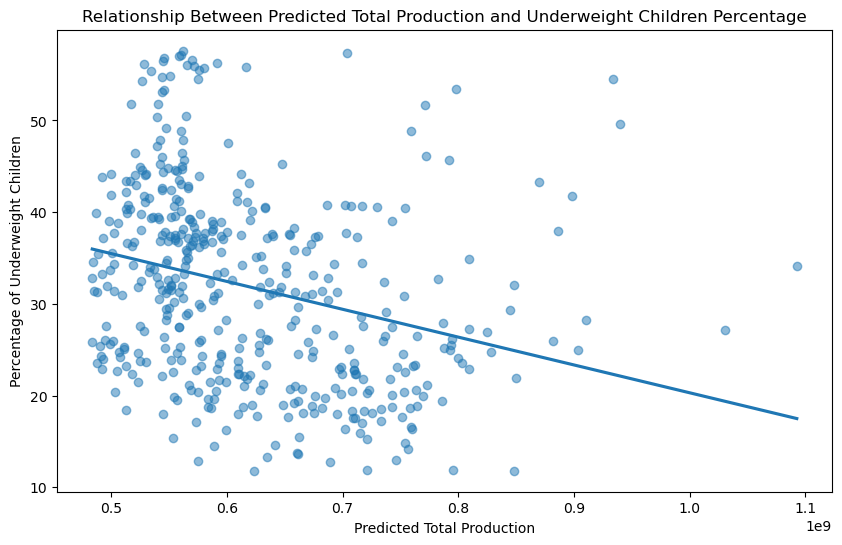

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the relationship between predicted total production and underweight children percentage
plt.figure(figsize=(10, 6))
sns.regplot(x='predicted_Total_Production', y='Underweight_Children_Percentage', data=merged_data, ci=None, scatter_kws={'alpha':0.5})

plt.title('Relationship Between Predicted Total Production and Underweight Children Percentage')
plt.xlabel('Predicted Total Production')
plt.ylabel('Percentage of Underweight Children')
plt.show()

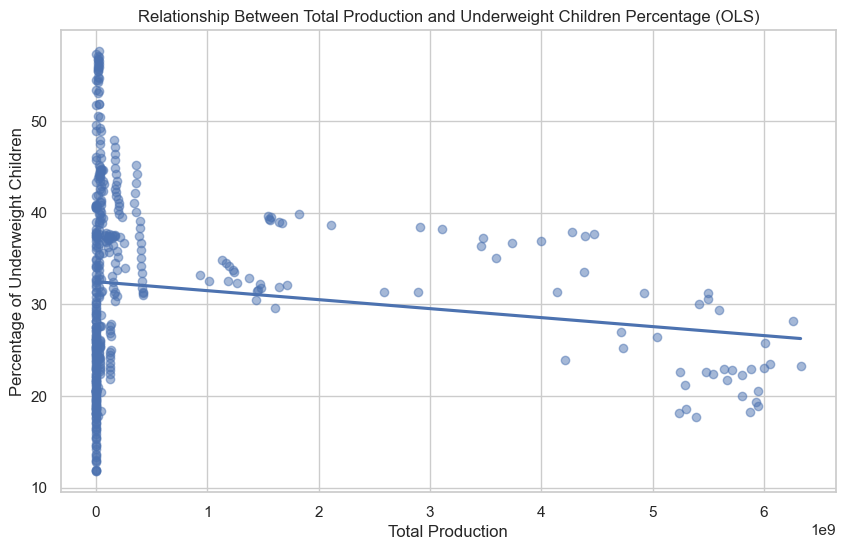

In [13]:
# Plotting the relationship between total production and underweight children percentage for the OLS model
plt.figure(figsize=(10, 6))
sns.regplot(x='Total_Production', y='Underweight_Children_Percentage', data=merged_data, ci=None, scatter_kws={'alpha':0.5})

plt.title('Relationship Between Total Production and Underweight Children Percentage (OLS)')
plt.xlabel('Total Production')
plt.ylabel('Percentage of Underweight Children')
plt.show()

In [3]:
import pandas as pd
import statsmodels.formula.api as smf


# temporal analsis
model_with_year = smf.ols('Underweight_Children_Percentage ~ Total_Production + Year', data=merged_data).fit()

# Displaying the results
results_with_year = model_with_year.summary()
print(results_with_year)


                                   OLS Regression Results                                  
Dep. Variable:     Underweight_Children_Percentage   R-squared:                       0.097
Model:                                         OLS   Adj. R-squared:                  0.093
Method:                              Least Squares   F-statistic:                     23.68
Date:                             Thu, 30 Nov 2023   Prob (F-statistic):           1.71e-10
Time:                                     23:38:34   Log-Likelihood:                -1651.2
No. Observations:                              443   AIC:                             3308.
Df Residuals:                                  440   BIC:                             3321.
Df Model:                                        2                                         
Covariance Type:                         nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.

In [6]:
from linearmodels import PanelOLS

#Geographical fixed effects 

# Prepare the data for PanelOLS
merged_data['Region_num'] = merged_data['Region'].astype('category').cat.codes
merged_data = merged_data.set_index(['Region_num', 'Year'])

# Performing fixed effects regression
fe_model = PanelOLS.from_formula('Underweight_Children_Percentage ~ Total_Production + EntityEffects', data=merged_data).fit()

# Displaying the results
print(fe_model.summary)


                                 PanelOLS Estimation Summary                                 
Dep. Variable:     Underweight_Children_Percentage   R-squared:                        0.0054
Estimator:                                PanelOLS   R-squared (Between):             -0.0195
No. Observations:                              443   R-squared (Within):               0.0054
Date:                             Thu, Nov 30 2023   R-squared (Overall):             -0.0195
Time:                                     23:43:02   Log-likelihood                   -1250.1
Cov. Estimator:                         Unadjusted                                           
                                                     F-statistic:                      2.2557
Entities:                                       24   P-value                           0.1339
Avg Obs:                                    18.458   Distribution:                   F(1,418)
Min Obs:                                    6.0000          

/Users/akashshaji/anaconda3/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
